# Read FISS data

## Data format
There are two kinds of level 1 data: one is the processed data that has the filename of either '\*1.fts', and the other is the compressed data that compresses the processed data using principle component analysis (PCA). The compressed data has two files one is the eigenvalue with the filename of '\*_c.fts', and another is the eigenvector with the name of '\*_p.fts'. To reconstruct the data, these two types of files should be in the same directory. Among these two, only the '\*_c.fts' file will be used to read the data, and '\*_p.fts' is used passively.

The table below summarizes these file types:
<table class="table table-bordered table-hover">
    <thead>
        <tr>
          <th class="thbg">File types</th><th class="thbg">Description</th>
        </tr>
    </thead>
    <tbody class="table-group-divider">
    <tr>
        <td>\*1.fts</td>  <td>Processed data.</td>
    </tr>
    <tr>
        <td>\*_c.fts</td>  <td>Eigenvalue of the compressed data (main file).</td>
    </tr>
    <tr>
        <td>\*_p.fts</td>  <td>Eigenvector of the compressed data (sub file).</td>
    </tr>
    </tbody>
</table>

## Read Data

Now, we are ready to read the FISS data. Here, we show how to handle the compressed data (\*_c.fts), but you can also use the same method for the processed data (\*1.fts).

To read the FISS data we use the [fisspy.read.FISS](/fisspy/read/FISS) module:

In [1]:
import fisspy
fname = './FISS_20140603_170841_A1_c.fts'
fiss = fisspy.read.FISS(fname)

You can read the data with the shape of (y,x,&lambda;) and the header with the .data and .header attributes.

In [2]:
fiss.data

array([[[7116.11181641, 7123.06005859, 7115.08935547, ...,
         7320.97900391, 7324.15869141, 7324.78466797],
        [7012.34667969, 7019.34082031, 7011.31054688, ...,
         7343.17773438, 7347.43310547, 7347.41552734],
        [7006.23193359, 7010.51171875, 7003.09912109, ...,
         7303.20996094, 7307.27441406, 7307.81689453],
        ...,
        [7113.49462891, 7114.36230469, 7106.13232422, ...,
         7631.99072266, 7633.38232422, 7634.62695312],
        [7081.48779297, 7079.49414062, 7071.55175781, ...,
         7578.56396484, 7580.08105469, 7581.52392578],
        [7092.57421875, 7091.46142578, 7084.03515625, ...,
         7555.39111328, 7556.4609375 , 7557.59423828]],

       [[7212.64746094, 7219.09814453, 7212.01953125, ...,
         7318.93017578, 7322.15234375, 7322.57910156],
        [7177.25439453, 7182.99804688, 7175.34472656, ...,
         7355.71191406, 7359.23193359, 7358.66357422],
        [7132.80810547, 7136.59228516, 7129.38623047, ...,
         7305.

In [3]:
fiss.header

SIMPLE  =                    T /  file does conform to FITS standard            
BITPIX  =                   16 /  number of bits per data pixel                 
NAXIS   =                    3 /  number of data axes                           
NAXIS1  =                  512 /  length of data axis 1                         
NAXIS2  =                  256 /  length of data axis 2                         
NAXIS3  =                  130 /  length of data axis 3                         
DATE    = '2014-06-03T17:08:41' /  file creation date (YYYY-MM-DDThh:mm:s       
EXPTIME =                 0.03 /  Second                                        
HBINNING=                    1                                                  
VBINNING=                    2                                                  
GAIN    =                    0 /  Value Range: 0-255                            
STRTIME = '2014.06.03-17:08:24' /  Scan Start Time                              
ENDTIME = '2014.06.03-17:08:

When you read the FISS data without any optional keyword, the wavelength will be calibrated using the information in the fits header. This calibration method always works, but it does not reflect the instrumental or time-varying shift of the line profile. Hence, we recommend recalibrating the wavelength using [wvCalib](../#wvCalib) with the method keyword of either 'center' or 'photo'.

In [9]:
fiss.wave = fiss.wvCalib(method='photo')
print(fiss.wave[250-5:250+5])

[6562.50901164 6562.52811525 6562.54721886 6562.56632247 6562.58542608
 6562.60452969 6562.6236333  6562.64273691 6562.66184052 6562.68094413]


You can correct the stray light and line asymmetry using the '[corSLA](../#corSLA)' method.

In [4]:
fiss.corSLA()

You can smooth the spectral profile using the '[smoothingProf](../#smoothingProf)'.

In [5]:
fiss.smoothingProf()

If you want to reset the data, you can reload the data using the '[reload](../#reload)'.

In [6]:
fiss.reload

Now we draw the quick look interactive figure for the raster and spectral profile.
For this we use '[.imshow](../#imshow)' method.

Note that if you run the interactive figure, you should change the [matplotlib backend](https://matplotlib.org/stable/users/explain/figure/backends.html#interactive-backends) first:

In [10]:
%matplotlib

Using matplotlib backend: <object object at 0x0000025F4F9EF550>


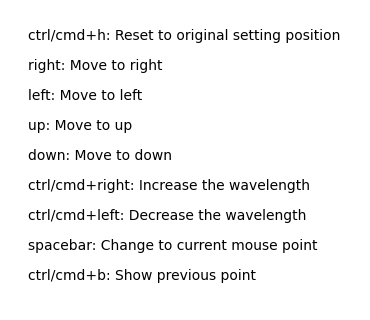

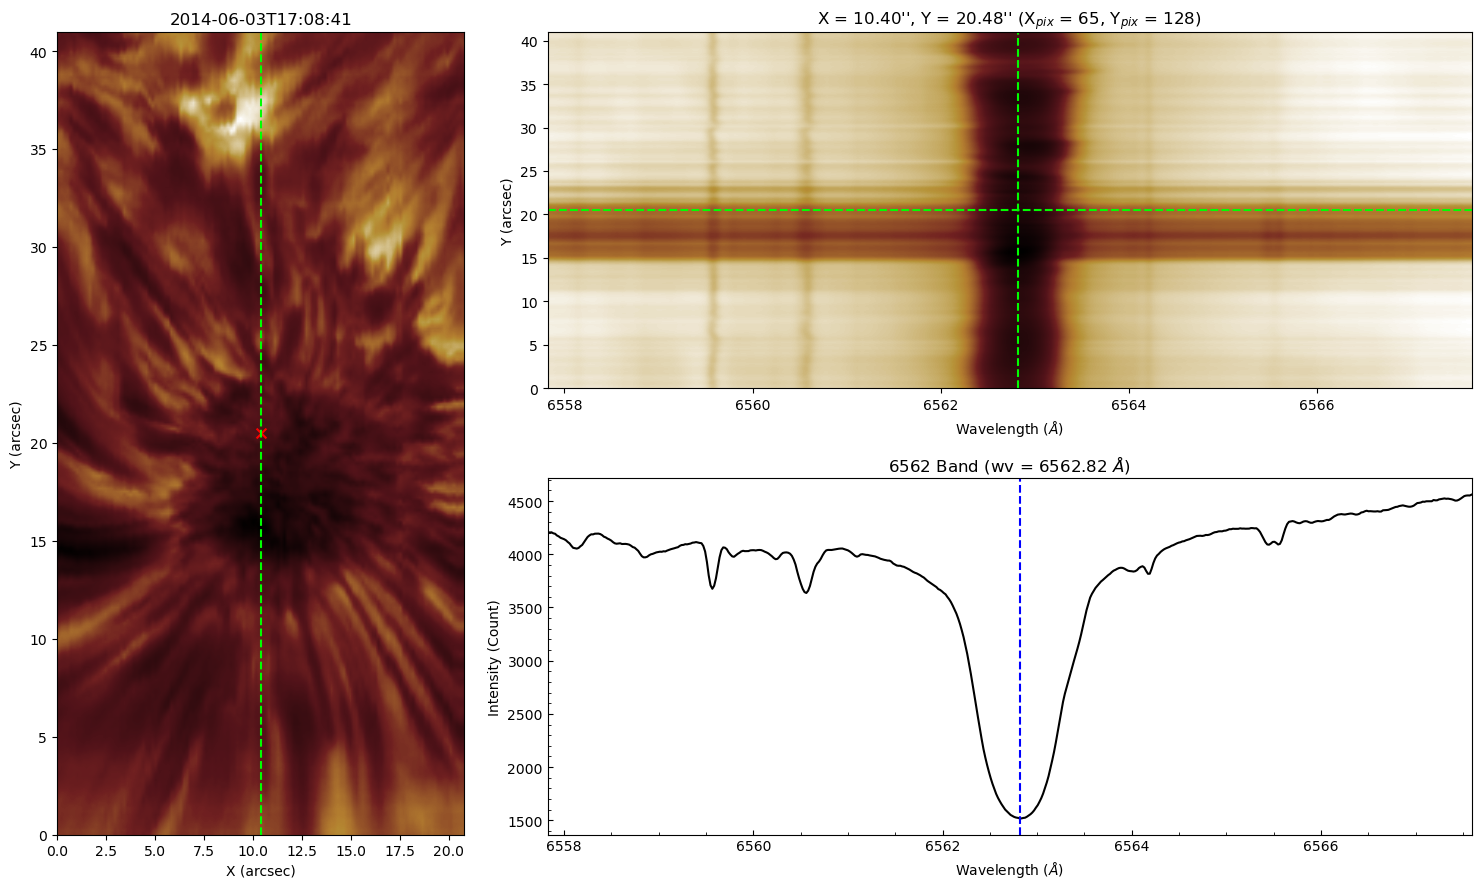

In [13]:
fiss.imshow()

If you do not set the help box keyword to False, two figures will pop up: one is the main figure, and another is the help box for the interactive keys.

Following the help box figure or the below table for interactive keys, you can select or adjust the pixel point to change the raster image or profile.

<table class="table table-bordered table-hover">
    <thead>
        <tr>
          <th class="thbg">Keys</th><th class="thbg">Description</th>
        </tr>
      </thead>
      <tbody class="table-group-divider">
        <tr>
          <td>ctrl/cmd+h</td>  <td>Return to original setting position.</td>
        </tr>
        <tr>
          <td>right</td>  <td>Change the spectrograph and profile at the pixel of x+1.</td>
        </tr>
        <tr>
          <td>left</td>  <td>Change the spectrograph and profile at the pixel of x-1.</td>
        </tr>
        <tr>
          <td>up</td>  <td>Change the profile at the pixel of y+1.</td>
        </tr>
        <tr>
          <td>down</td>  <td>Change the profile at the pixel of y-1.</td>
        </tr>
        <tr>
          <td>ctrl/cmd+right</td>  <td>Show the raster image with &lambda;+1.</td>
        </tr>
        <tr>
          <td>ctrl/cmd+left</td>  <td>Show the raster image with &lambda;-1.</td>
        </tr>
        <tr>
          <td>spacebar</td>  <td>Show the raster image with &lambda;-1.</td>
        </tr>
        <tr>
          <td>ctrl/cmd+b</td>  <td>Show the previous point. It is used to blink between two points.</td>
        </tr>
      </tbody>
</table>

For details of the attributes and methods please see [fisspy.read.FISS](../) document page.